In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-survey-data/lung cancer survey.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [3]:
df = pd.read_csv('/kaggle/input/lung-cancer-survey-data/lung cancer survey.csv')

**Variable Description**
* **Gender: M(male), F(female)**
* **Age: Age of the patient**
* **Smoking: YES=2 , NO=1.**
* **Yellow fingers: YES=2 , NO=1.**
* **Anxiety: YES=2 , NO=1.**
* **Peer_pressure: YES=2 , NO=1.**
* **Chronic Disease: YES=2 , NO=1.**
* **Fatigue: YES=2 , NO=1.**
* **Allergy: YES=2 , NO=1.**
* **Wheezing: YES=2 , NO=1.**
* **Alcohol: YES=2 , NO=1.**
* **Coughing: YES=2 , NO=1.**
* **Shortness of Breath: YES=2 , NO=1.**
* **Swallowing Difficulty: YES=2 , NO=1.**
* **Chest pain: YES=2 , NO=1.**
* **Lung Cancer: YES , NO.**

In [4]:
df.shape

(309, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


**Missing Value Check**

In [7]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**Duplicated value check**

In [8]:
df.duplicated().sum()

33

# **2. Data Transform for Visualization**

In [9]:
df = df.drop_duplicates(inplace = False)

**Data Check**

In [10]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [11]:
df.duplicated().sum()

0

# **3. Data Visualization**

## **Histogram**

In [12]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns

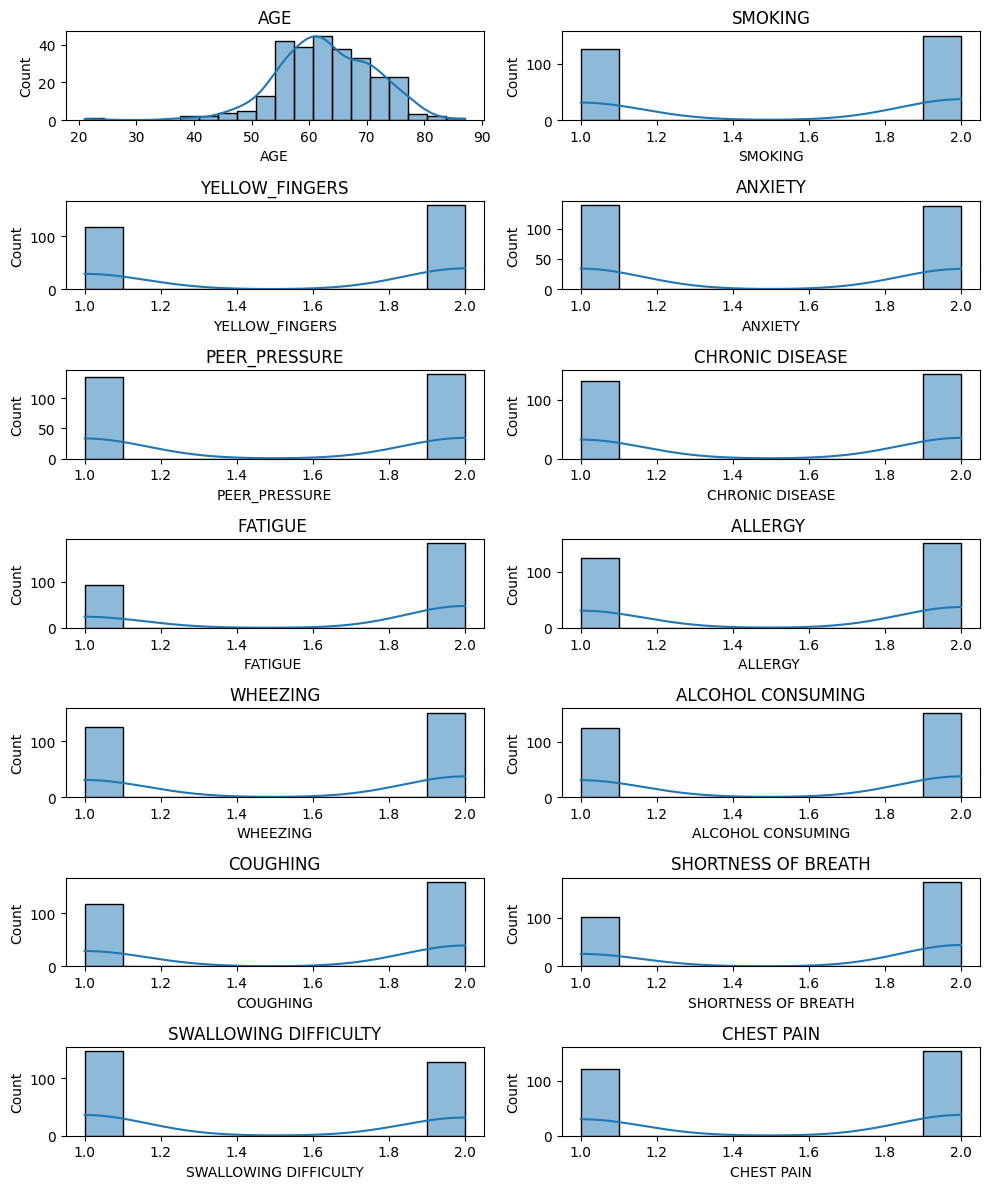

In [13]:
f, ax = plt.subplots(7,2 , figsize=(10, 12))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **Countplot**

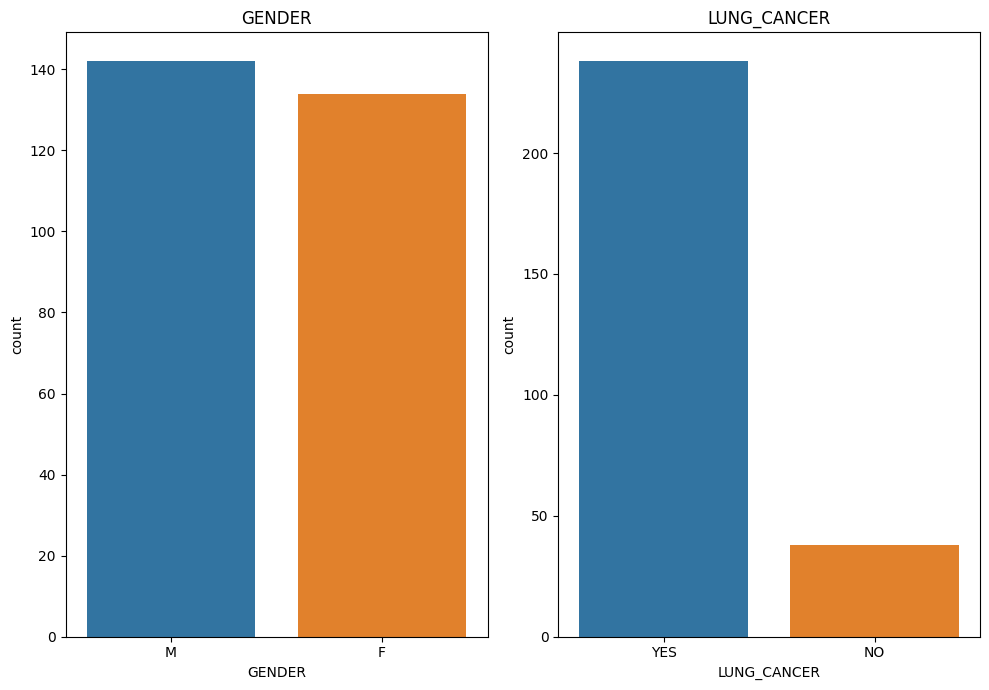

In [14]:
f, ax = plt.subplots(1,2 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

## **The Average age of people with and without lung cancer**

In [15]:
avg_age = df.groupby(['LUNG_CANCER'])['AGE'].mean().reset_index()

In [16]:
avg_age

,LUNG_CANCER,AGE
0,NO,60.684211
1,YES,63.264706


In [17]:
px.bar(avg_age, x= 'LUNG_CANCER' , y = 'AGE', text_auto = True, title = 'The Average Age of people with and without lung cancer', template='plotly_dark')

## **The Relationship between Chest Pain and Lung Cancer**

In [18]:
chest_pain = df.groupby(['LUNG_CANCER','CHEST PAIN']).size().reset_index(name='count')

In [19]:
chest_pain

,LUNG_CANCER,CHEST PAIN,count
0,NO,1,26
1,NO,2,12
2,YES,1,96
3,YES,2,142


In [20]:
px.bar(chest_pain, x= 'CHEST PAIN' , y = 'count', color = 'LUNG_CANCER', barmode='group', text_auto = True, title = 'The Relationship between Chest Pain and Lung Cancer', template='plotly_dark')

## **The Relationship between Alchohol and Lung Cancer**

In [21]:
alcohol = df.groupby(['LUNG_CANCER','ALCOHOL CONSUMING']).size().reset_index(name='count')

In [22]:
alcohol

,LUNG_CANCER,ALCOHOL CONSUMING,count
0,NO,1,31
1,NO,2,7
2,YES,1,93
3,YES,2,145


In [23]:
px.bar(alcohol, x= 'ALCOHOL CONSUMING' , y = 'count', color = 'LUNG_CANCER', barmode='group', text_auto = True, title = 'The Relationship between Alchohol and Lung Cancer', template='plotly_dark')

## **The Relationship between Smoking and Lung Cancer**

In [24]:
Smoking = df.groupby(['LUNG_CANCER','SMOKING']).size().reset_index(name='count')

In [25]:
Smoking

,LUNG_CANCER,SMOKING,count
0,NO,1,19
1,NO,2,19
2,YES,1,107
3,YES,2,131


In [26]:
px.bar(Smoking, x= 'SMOKING' , y = 'count', color = 'LUNG_CANCER', barmode='group', text_auto = True, title = 'The Relationship between Smoking and Lung Cancer', template='plotly_dark')

## **The Relationship between yellow fingers and Lung Cancer**

In [27]:
yellow_fingers = df.groupby(['LUNG_CANCER','YELLOW_FINGERS']).size().reset_index(name='count')

In [28]:
yellow_fingers

,LUNG_CANCER,YELLOW_FINGERS,count
0,NO,1,25
1,NO,2,13
2,YES,1,92
3,YES,2,146


In [29]:
px.bar(yellow_fingers, x= 'YELLOW_FINGERS' , y = 'count', color = 'LUNG_CANCER', barmode='group', text_auto = True, title = 'The Relationship between yellow fingers and Lung Cancer', template='plotly_dark')

## **The Relationship between chronic desease and Lung Cancer**

In [30]:
chronic_disease = df.groupby(['LUNG_CANCER','CHRONIC DISEASE']).size().reset_index(name='count')

In [31]:
chronic_disease

,LUNG_CANCER,CHRONIC DISEASE,count
0,NO,1,25
1,NO,2,13
2,YES,1,107
3,YES,2,131


In [32]:
px.bar(chronic_disease, x= 'CHRONIC DISEASE' , y = 'count', color = 'LUNG_CANCER', barmode='group', text_auto = True, title = 'The Relationship between chronic desease and Lung Cancer', template='plotly_dark')

## **Correlation**

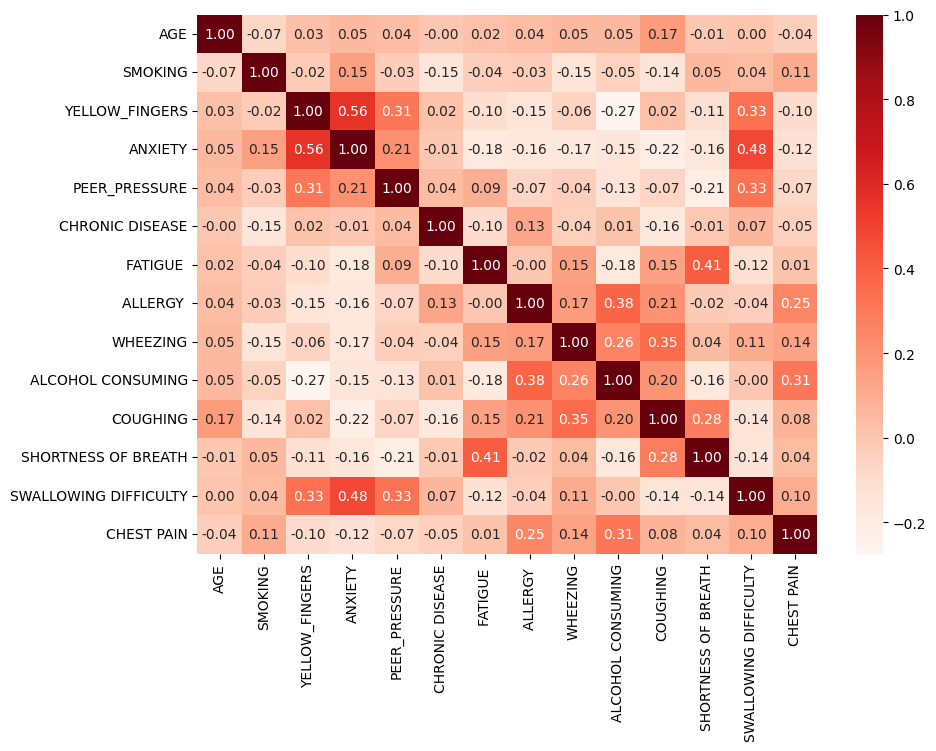

In [33]:
plt.subplots(figsize=(10, 7))
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

# **4. Modeling**

In [96]:
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow import keras
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import regularizers
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Encoding**

In [35]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [36]:
x = df.drop(['LUNG_CANCER'],axis=1)
y = df['LUNG_CANCER']

In [37]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## **Train Test Split**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Neural Network**

In [68]:
model = keras.Sequential([
    layers.Dense(16, activation ='relu', kernel_regularizer=regularizers.l2(0.001),),      
    layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l2(0.001),),  
    layers.Dense(1, activation='sigmoid')
    ])

In [69]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer= optimizer,
             loss='binary_crossentropy', 
                metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split=0.2)
history

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3266 - loss: 0.8321 - val_accuracy: 0.6136 - val_loss: 0.7089
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6079 - loss: 0.7087 - val_accuracy: 0.7727 - val_loss: 0.6458
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7431 - loss: 0.6579 - val_accuracy: 0.8182 - val_loss: 0.6013
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7922 - loss: 0.6228 - val_accuracy: 0.8409 - val_loss: 0.5616
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8179 - loss: 0.5861 - val_accuracy: 0.9091 - val_loss: 0.5261
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8492 - loss: 0.5582 - val_accuracy: 0.9091 - val_loss: 0.4935
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8532 - loss: 0.5292 - val_accuracy: 0.9091 - val_loss: 0.4634
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8600 - loss: 0.5058 - val_accuracy: 0.9091 - val_loss: 0.4360
Epoch 9

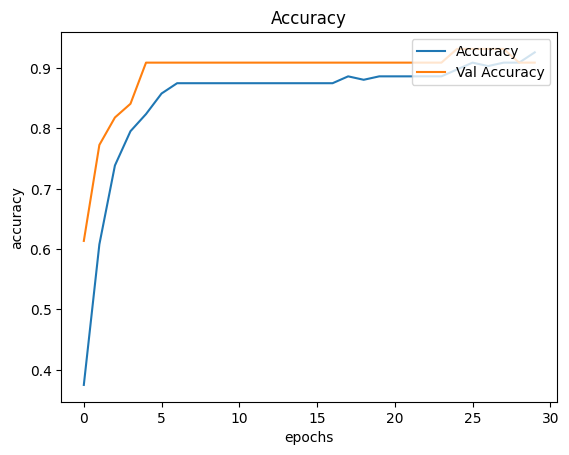

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

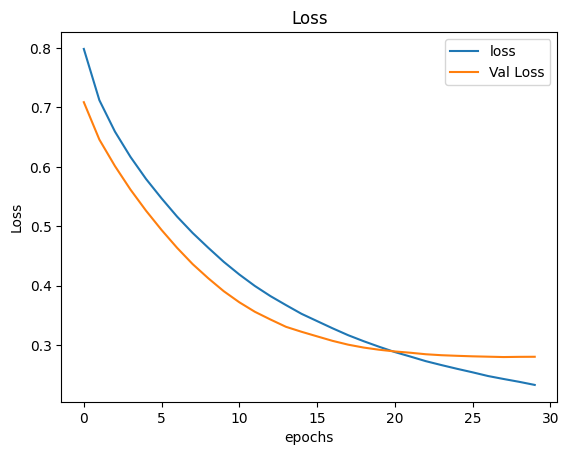

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [67]:
model.evaluate(X_test,y_test,verbose=2)

2/2 - 0s - 12ms/step - accuracy: 0.8571 - loss: 0.3948


[0.3947599232196808, 0.8571428656578064]

In [100]:
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [102]:
pred = np.where(pred > 0.5,1,0)

In [103]:
cm = confusion_matrix(y_test, pred)

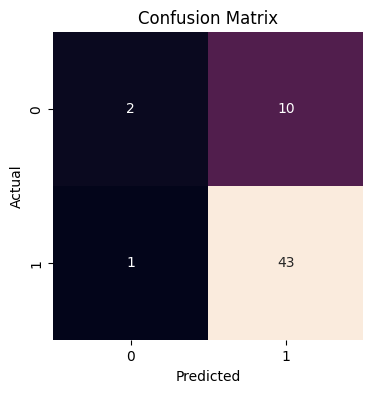

In [104]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [105]:
accuracy = accuracy_score(y_test, pred)

In [106]:
model_report = classification_report(y_test, pred)

In [107]:
print(f'Model accuracy: {round(accuracy,4)}')
print('Classification Report:')
print(f'{model_report}')

Model accuracy: 0.8036
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.81      0.98      0.89        44

    accuracy                           0.80        56
   macro avg       0.74      0.57      0.58        56
weighted avg       0.78      0.80      0.75        56



**Thankyou. Please leave your advice in the comments**